In [1]:
!pip install tensorflow

In [2]:
!pip list


Package                                 Version
--------------------------------------- -------------------
absl-py                                 2.1.0
accelerate                              0.29.3
adal                                    1.2.7
adlfs                                   2024.4.1
aiofiles                                22.1.0
aiohttp                                 3.9.5
aiohttp-cors                            0.7.0
aiosignal                               1.3.1
aiosqlite                               0.20.0
annotated-types                         0.7.0
ansicolors                              1.1.8
antlr4-python3-runtime                  4.13.1
anyio                                   4.3.0
applicationinsights                     0.11.10
arch                                    5.6.0
argcomplete                             3.1.6
argon2-cffi                             23.1.0
argon2-cffi-bindings                    21.2.0
arrow                                   1.3.0
astroid

In [3]:
!pip install --upgrade tensorflow


  Using cached tensorflow-2.17.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
Using cached tensorflow-2.17.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.0 MB/s eta 0:00:00
Using cached tensorboard-2.17.1-py3-none-any.whl (5.5 MB)
Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl (6.6 MB)
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
  Attempting uninstal

In [4]:
!pip install tensorflow==2.11.0


  Using cached tensorflow-2.11.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.1 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached protobuf-3.19.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (787 bytes)
  Using cached tensorboard-2.11.2-py3-none-any.whl.metadata (1.9 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl.metadata (1.1 kB)
Using cached tensorflow-2.11.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
Using cached protobuf-3.19.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.

In [35]:
import numpy as np
import time
import random
from collections import defaultdict
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [36]:

# Simple Neural Network (ML Model)
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [37]:

# Cache Policies
class Cache:
    def __init__(self, max_size):
        self.max_size = max_size
        self.cache = {}

    def access_data(self, key, fetch_data_func):
        raise NotImplementedError("This method should be overridden by subclasses")

class LRUCache(Cache):
    def __init__(self, max_size):
        super().__init__(max_size)
        self.order = []

    def access_data(self, key, fetch_data_func):
        if key in self.cache:
            # Cache hit
            self.order.remove(key)
            self.order.append(key)
            return self.cache[key], True
        else:
            # Cache miss
            if len(self.cache) >= self.max_size:
                oldest_key = self.order.pop(0)
                del self.cache[oldest_key]
            data = fetch_data_func(key)
            self.cache[key] = data
            self.order.append(key)
            return data, False

In [38]:

class LFUCache(Cache):
    def __init__(self, max_size):
        super().__init__(max_size)
        self.freq = defaultdict(int)

    def access_data(self, key, fetch_data_func):
        if key in self.cache:
            # Cache hit
            self.freq[key] += 1
            return self.cache[key], True
        else:
            # Cache miss
            if len(self.cache) >= self.max_size:
                least_freq_key = min(self.freq, key=self.freq.get)
                del self.cache[least_freq_key]
                del self.freq[least_freq_key]
            data = fetch_data_func(key)
            self.cache[key] = data
            self.freq[key] = 1
            return data, False

class RandomCache(Cache):
    def __init__(self, max_size):
        super().__init__(max_size)

    def access_data(self, key, fetch_data_func):
        if key in self.cache:
            # Cache hit
            return self.cache[key], True
        else:
            # Cache miss
            if len(self.cache) >= self.max_size:
                random_key = random.choice(list(self.cache.keys()))
                del self.cache[random_key]
            data = fetch_data_func(key)
            self.cache[key] = data
            return data, False


In [39]:
# Fetch actual MNIST data
def fetch_data(batch_id, x_train, y_train, batch_size=100):
    start_index = batch_id * batch_size
    end_index = start_index + batch_size
    return (x_train[start_index:end_index], y_train[start_index:end_index])

# Function to train model with cache optimization
def train_model_with_cache(cache_policy, epochs=2, max_cache_size=5):
    model = create_model()
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize data to range [0, 1]
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    total_cache_hits = 0
    total_batches = len(x_train) // 100  # Assuming batch size of 100

    # Create cache instance
    cache = cache_policy(max_cache_size)

    # Training Loop
    for epoch in range(epochs):
        for batch_id in range(total_batches):
            data, hit = cache.access_data(batch_id, lambda key: fetch_data(key, x_train, y_train))
            total_cache_hits += int(hit)
            model.train_on_batch(data[0], data[1])

    hit_ratio = total_cache_hits / total_batches * 100
    return hit_ratio

In [40]:



# Measure time and hit ratio for each cache policy
start = time.time()
lru_hit_ratio = train_model_with_cache(LRUCache)
lru_time = time.time() - start

start = time.time()
lfu_hit_ratio = train_model_with_cache(LFUCache)
lfu_time = time.time() - start

start = time.time()
random_hit_ratio = train_model_with_cache(RandomCache)
random_time = time.time() - start

# Output the results
print(f"LRU Cache - Time: {lru_time:.2f} sec, Hit Ratio: {lru_hit_ratio:.2f}%")
print(f"LFU Cache - Time: {lfu_time:.2f} sec, Hit Ratio: {lfu_hit_ratio:.2f}%")
print(f"Random Cache - Time: {random_time:.2f} sec, Hit Ratio: {random_hit_ratio:.2f}%")


LRU Cache - Time: 9.56 sec, Hit Ratio: 0.00%
LFU Cache - Time: 9.89 sec, Hit Ratio: 0.00%
Random Cache - Time: 9.84 sec, Hit Ratio: 0.00%


In [41]:

            

# Function to train model with cache optimization
def train_model_with_cache(cache_policy, epochs=2, max_cache_size=5):
    model = create_model()
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize data to range [0, 1]
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    total_cache_hits = 0
    total_cache_misses = 0
    total_batches = len(x_train) // 100  # Assuming batch size of 100

    # Create cache instance
    cache = cache_policy(max_cache_size)

    # Training Loop: Access the same batches multiple times
    for epoch in range(epochs):
        # Randomly shuffle batch indices
        batch_indices = list(range(total_batches))
        random.shuffle(batch_indices)

        for batch_id in batch_indices:
            data, hit = cache.access_data(batch_id, lambda key: fetch_data(key, x_train, y_train))
            if hit:
                total_cache_hits += 1
            else:
                total_cache_misses += 1
            model.train_on_batch(data[0], data[1])

    hit_ratio = total_cache_hits / (total_cache_hits + total_cache_misses) * 100 if (total_cache_hits + total_cache_misses) > 0 else 0
    return hit_ratio, total_cache_hits, total_cache_misses

# Measure time and hit ratio for each cache policy
start = time.time()
lru_hit_ratio, lru_hits, lru_misses = train_model_with_cache(LRUCache)
lru_time = time.time() - start

start = time.time()
lfu_hit_ratio, lfu_hits, lfu_misses = train_model_with_cache(LFUCache)
lfu_time = time.time() - start

start = time.time()
random_hit_ratio, random_hits, random_misses = train_model_with_cache(RandomCache)
random_time = time.time() - start

# Output the results
print(f"LRU Cache - Time: {lru_time:.2f} sec, Hit Ratio: {lru_hit_ratio:.2f}%, Hits: {lru_hits}, Misses: {lru_misses}")
print(f"LFU Cache - Time: {lfu_time:.2f} sec, Hit Ratio: {lfu_hit_ratio:.2f}%, Hits: {lfu_hits}, Misses: {lfu_misses}")
print(f"Random Cache - Time: {random_time:.2f} sec, Hit Ratio: {random_hit_ratio:.2f}%, Hits: {random_hits}, Misses: {random_misses}")


LRU Cache - Time: 10.38 sec, Hit Ratio: 0.00%, Hits: 0, Misses: 1200
LFU Cache - Time: 10.36 sec, Hit Ratio: 0.00%, Hits: 0, Misses: 1200
Random Cache - Time: 10.28 sec, Hit Ratio: 0.00%, Hits: 0, Misses: 1200


In [42]:


# Function to train model with cache optimization
def train_model_with_cache(cache_policy, epochs=2, max_cache_size=10):  # Increased cache size
    model = create_model()
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize data to range [0, 1]
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    total_cache_hits = 0
    total_cache_misses = 0
    total_batches = len(x_train) // 100  # Assuming batch size of 100

    # Create cache instance
    cache = cache_policy(max_cache_size)

    # Training Loop: Access batches in a structured manner
    for epoch in range(epochs):
        for batch_id in range(total_batches):  # Access all batches sequentially
            data, hit = cache.access_data(batch_id, lambda key: fetch_data(key, x_train, y_train))
            if hit:
                total_cache_hits += 1
            else:
                total_cache_misses += 1
            model.train_on_batch(data[0], data[1])
        
        # Optionally repeat accessing a few selected batches to simulate higher access frequency
        for _ in range(5):  # Repeat the last few batches multiple times
            for batch_id in range(5):  # Access last 5 batches
                data, hit = cache.access_data(total_batches - 5 + batch_id, lambda key: fetch_data(key, x_train, y_train))
                if hit:
                    total_cache_hits += 1
                else:
                    total_cache_misses += 1
                model.train_on_batch(data[0], data[1])

    hit_ratio = total_cache_hits / (total_cache_hits + total_cache_misses) * 100 if (total_cache_hits + total_cache_misses) > 0 else 0
    return hit_ratio, total_cache_hits, total_cache_misses

# Measure time and hit ratio for each cache policy
start = time.time()
lru_hit_ratio, lru_hits, lru_misses = train_model_with_cache(LRUCache)
lru_time = time.time() - start

start = time.time()
lfu_hit_ratio, lfu_hits, lfu_misses = train_model_with_cache(LFUCache)
lfu_time = time.time() - start

start = time.time()
random_hit_ratio, random_hits, random_misses = train_model_with_cache(RandomCache)
random_time = time.time() - start

# Output the results
print(f"LRU Cache - Time: {lru_time:.2f} sec, Hit Ratio: {lru_hit_ratio:.2f}%, Hits: {lru_hits}, Misses: {lru_misses}")
print(f"LFU Cache - Time: {lfu_time:.2f} sec, Hit Ratio: {lfu_hit_ratio:.2f}%, Hits: {lfu_hits}, Misses: {lfu_misses}")
print(f"Random Cache - Time: {random_time:.2f} sec, Hit Ratio: {random_hit_ratio:.2f}%, Hits: {random_hits}, Misses: {random_misses}")


LRU Cache - Time: 10.05 sec, Hit Ratio: 4.00%, Hits: 50, Misses: 1200
LFU Cache - Time: 10.15 sec, Hit Ratio: 4.40%, Hits: 55, Misses: 1195
Random Cache - Time: 10.07 sec, Hit Ratio: 3.36%, Hits: 42, Misses: 1208


In [43]:
# Function to train model with cache optimization
def train_model_with_cache(cache_policy, epochs=2, max_cache_size=20):  # Increased cache size
    model = create_model()
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize data to range [0, 1]
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    total_cache_hits = 0
    total_cache_misses = 0
    total_batches = len(x_train) // 100  # Assuming batch size of 100

    cache = cache_policy(max_cache_size)

    # Training Loop with overlapping batch access
    for epoch in range(epochs):
        for batch_id in range(total_batches):
            # Fetch current batch
            data, hit = cache.access_data(batch_id, lambda key: fetch_data(key, x_train, y_train))
            total_cache_hits += hit
            total_cache_misses += not hit
            model.train_on_batch(data[0], data[1])

            # Fetch the previous batch if it exists (overlapping access)
            if batch_id > 0:
                data, hit = cache.access_data(batch_id - 1, lambda key: fetch_data(key, x_train, y_train))
                total_cache_hits += hit
                total_cache_misses += not hit
                model.train_on_batch(data[0], data[1])

        # Optionally repeat accessing a few selected batches
        for _ in range(5):  # Repeat the last few batches
            for batch_id in range(5):  # Access last 5 batches
                data, hit = cache.access_data(total_batches - 5 + batch_id, lambda key: fetch_data(key, x_train, y_train))
                total_cache_hits += hit
                total_cache_misses += not hit
                model.train_on_batch(data[0], data[1])

    hit_ratio = total_cache_hits / (total_cache_hits + total_cache_misses) * 100 if (total_cache_hits + total_cache_misses) > 0 else 0
    return hit_ratio, total_cache_hits, total_cache_misses

# Measure time and hit ratio for each cache policy
start = time.time()
lru_hit_ratio, lru_hits, lru_misses = train_model_with_cache(LRUCache)
lru_time = time.time() - start

start = time.time()
lfu_hit_ratio, lfu_hits, lfu_misses = train_model_with_cache(LFUCache)
lfu_time = time.time() - start

start = time.time()
random_hit_ratio, random_hits, random_misses = train_model_with_cache(RandomCache)
random_time = time.time() - start

# Output the results
print(f"LRU Cache - Time: {lru_time:.2f} sec, Hit Ratio: {lru_hit_ratio:.2f}%, Hits: {lru_hits}, Misses: {lru_misses}")
print(f"LFU Cache - Time: {lfu_time:.2f} sec, Hit Ratio: {lfu_hit_ratio:.2f}%, Hits: {lfu_hits}, Misses: {lfu_misses}")
print(f"Random Cache - Time: {random_time:.2f} sec, Hit Ratio: {random_hit_ratio:.2f}%, Hits: {random_hits}, Misses: {random_misses}")


LRU Cache - Time: 19.88 sec, Hit Ratio: 50.98%, Hits: 1248, Misses: 1200
LFU Cache - Time: 19.58 sec, Hit Ratio: 2.33%, Hits: 57, Misses: 2391
Random Cache - Time: 19.16 sec, Hit Ratio: 48.24%, Hits: 1181, Misses: 1267


In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Define the results
results = {
    'Experiment 1': {'LRU': (9.56, 0.00), 'LFU': (9.89, 0.00), 'Random': (9.84, 0.00)},
    'Experiment 2': {'LRU': (10.38, 0.00), 'LFU': (10.36, 0.00), 'Random': (10.28, 0.00)},
    'Experiment 3': {'LRU': (10.05, 4.00), 'LFU': (10.15, 4.40), 'Random': (10.07, 3.36)},
    'Experiment 4': {'LRU': (19.88, 50.98), 'LFU': (19.58, 2.33), 'Random': (19.16, 48.24)},
}

# Prepare the data for plotting
labels = ['LRU', 'LFU', 'Random']
times = []
hit_ratios = []

for exp in results.values():
    times.append([exp[label][0] for label in labels])
    hit_ratios.append([exp[label][1] for label in labels])

times = np.array(times)
hit_ratios = np.array(hit_ratios)


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

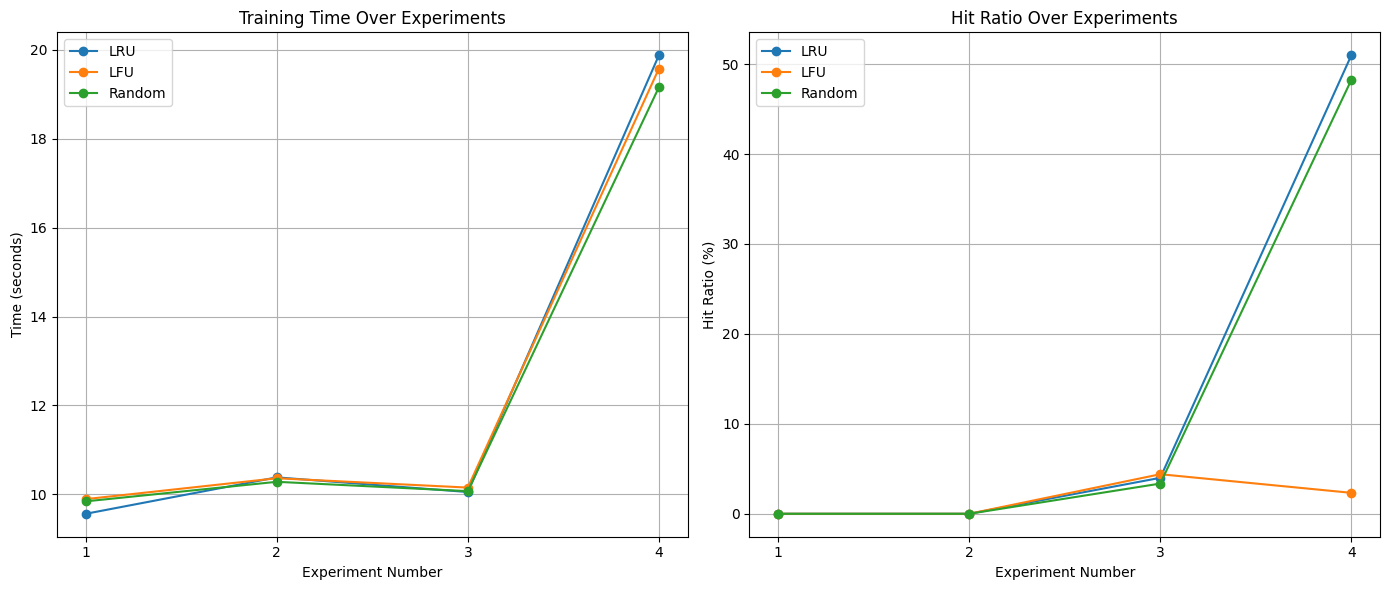

In [46]:
plt.figure(figsize=(14, 6))

# Plotting Time
plt.subplot(1, 2, 1)
for i, label in enumerate(labels):
    plt.plot(range(1, 5), times[:, i], marker='o', label=label)
plt.title('Training Time Over Experiments')
plt.xlabel('Experiment Number')
plt.xticks(range(1, 5))
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid()

# Plotting Hit Ratios
plt.subplot(1, 2, 2)
for i, label in enumerate(labels):
    plt.plot(range(1, 5), hit_ratios[:, i], marker='o', label=label)
plt.title('Hit Ratio Over Experiments')
plt.xlabel('Experiment Number')
plt.xticks(range(1, 5))
plt.ylabel('Hit Ratio (%)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


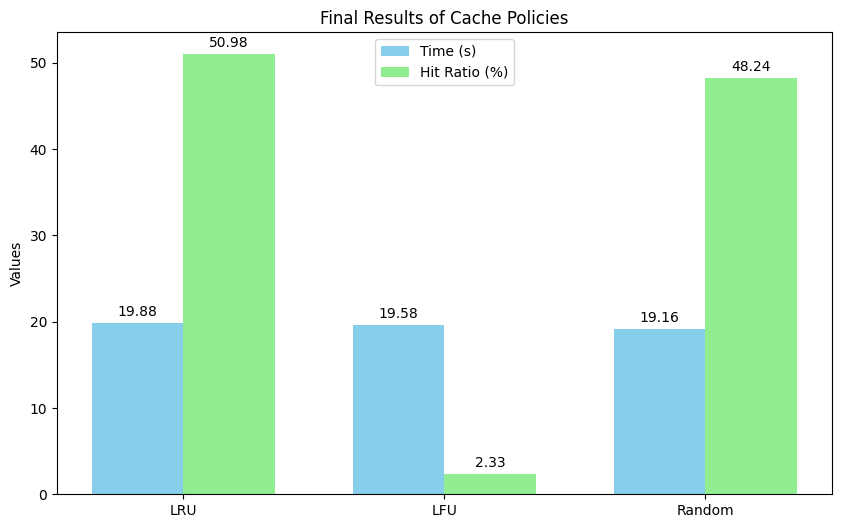

In [48]:
# Create a bar chart for the final experiment results
final_times = times[-1]
final_hit_ratios = hit_ratios[-1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, final_times, width, label='Time (s)', color='skyblue')
rects2 = ax.bar(x + width/2, final_hit_ratios, width, label='Hit Ratio (%)', color='lightgreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Final Results of Cache Policies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding data labels
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


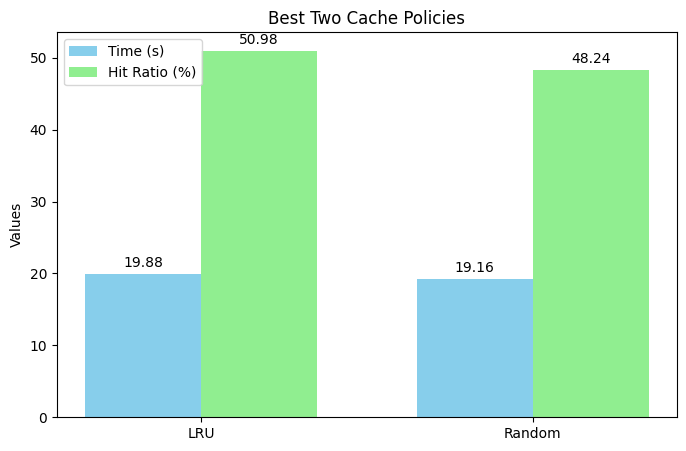

In [49]:
# Best two policies based on final results
best_labels = ['LRU', 'Random']
best_times = [final_times[0], final_times[2]]
best_hit_ratios = [final_hit_ratios[0], final_hit_ratios[2]]

x = np.arange(len(best_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, best_times, width, label='Time (s)', color='skyblue')
rects2 = ax.bar(x + width/2, best_hit_ratios, width, label='Hit Ratio (%)', color='lightgreen')

# Add labels and title
ax.set_ylabel('Values')
ax.set_title('Best Two Cache Policies')
ax.set_xticks(x)
ax.set_xticklabels(best_labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

plt.show()
